In [ ]:
! pip install -r requirements.txt

In [18]:
import json
f = open('task.json')

task_data = json.load(f)
evaluation_tasks = task_data["evaluation"]

In [27]:
def plot_examples(data_path, idx_list, *, save = None):
    training_tasks = sorted(os.listdir(data_path))
    for i in idx_list:
        task_file = str(data_path / training_tasks[i])
        with open(task_file, 'r') as f:
            task = json.load(f)
        cmap = colors.ListedColormap(
            ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
            '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
        norm = colors.Normalize(vmin=0, vmax=9)
        fig, axs = plt.subplots(1, 4, figsize=(15,15))
        axs[0].imshow(task['train'][0]['input'], cmap=cmap, norm=norm)
        axs[0].axis('off')
        axs[0].set_title('Train Input')
        axs[1].imshow(task['train'][0]['output'], cmap=cmap, norm=norm)
        axs[1].axis('off')
        axs[1].set_title('Train Output')
        axs[2].imshow(task['test'][0]['input'], cmap=cmap, norm=norm)
        axs[2].axis('off')
        axs[2].set_title('Test Input')
        axs[3].imshow(task['test'][0]['output'], cmap=cmap, norm=norm)
        axs[3].axis('off')
        axs[3].set_title('Test Output')
        plt.tight_layout()
        if save:
            plt.savefig( f"_{i}.".join(save.rsplit('.')))
        else:
            plt.show()

task: repeat_pattern_with_rotation count: 6 example: 0


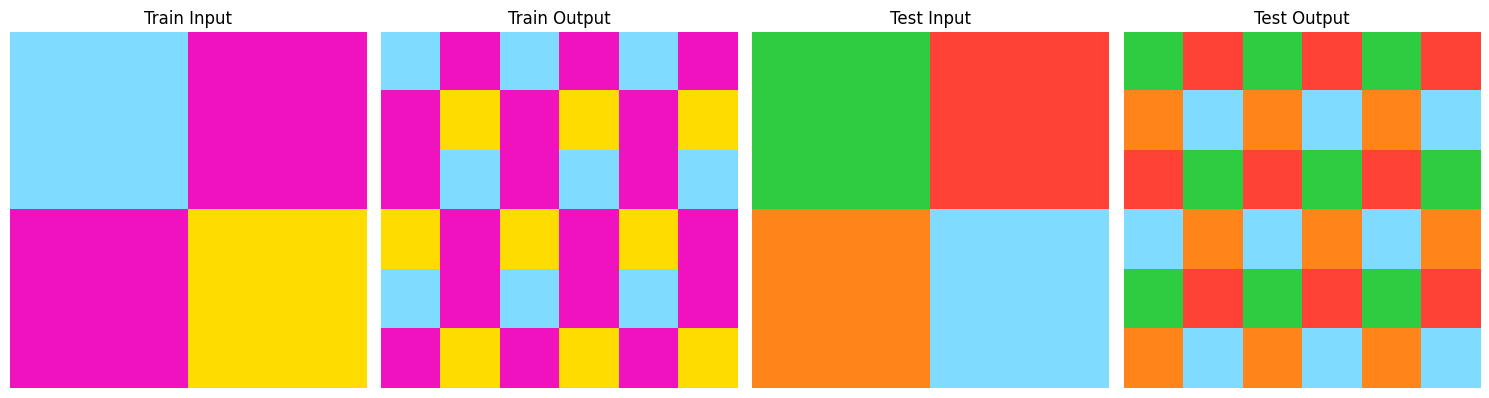

task: spread_out count: 5 example: 1


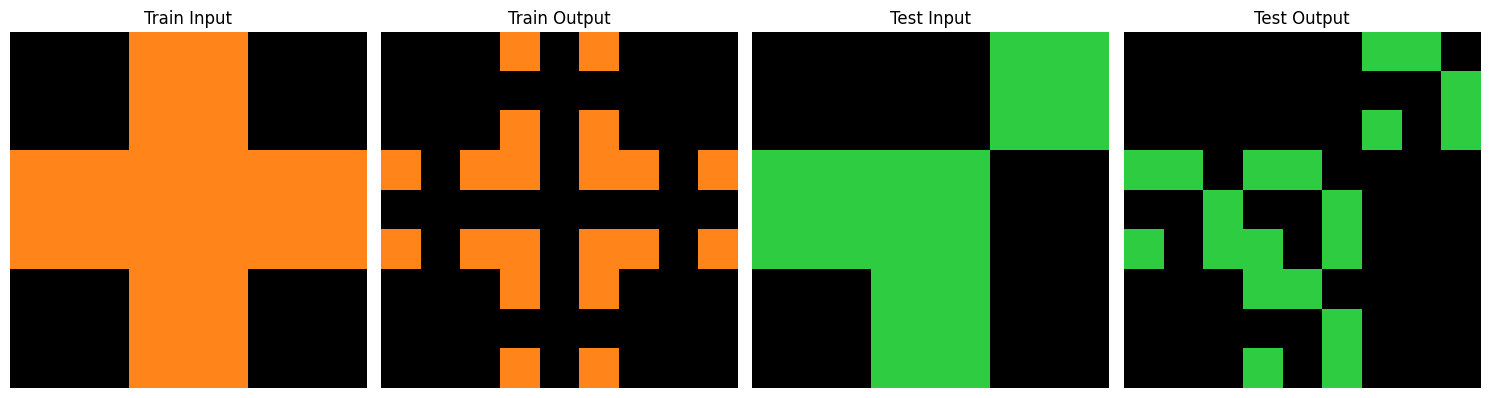

task: complete_sub_pattern count: 8 example: 3


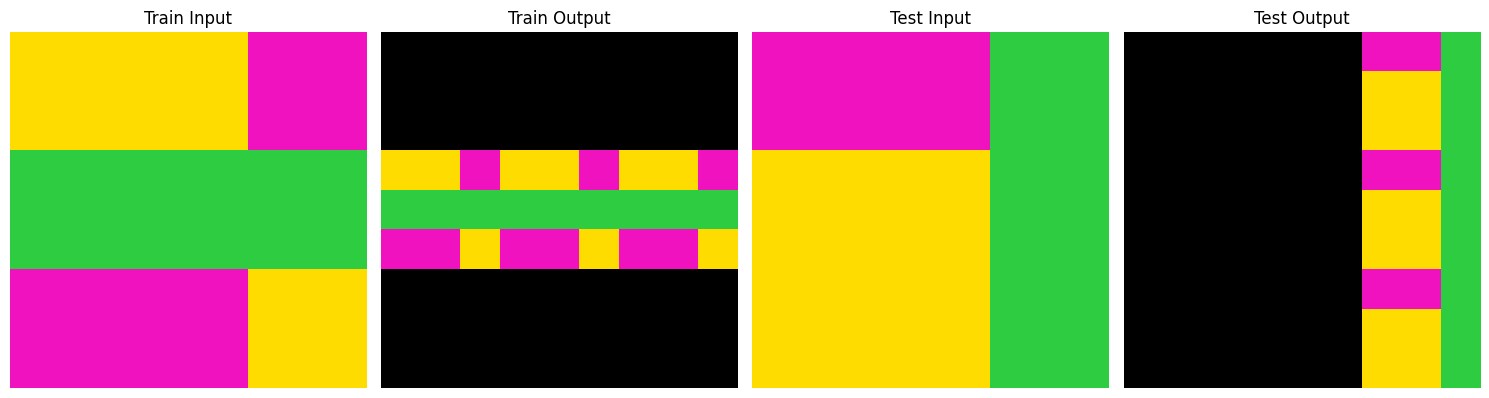

task: detect_pattern count: 1 example: 4


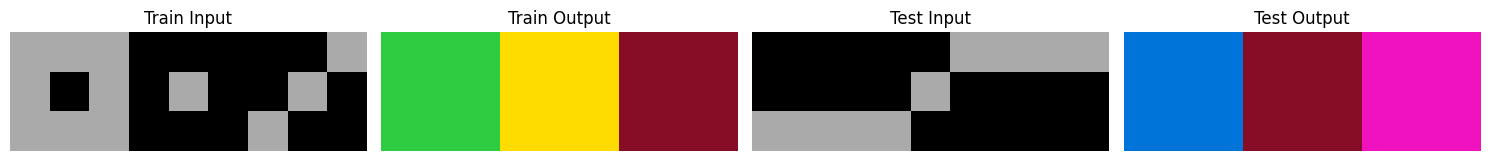

task: fill_pattern count: 4 example: 5


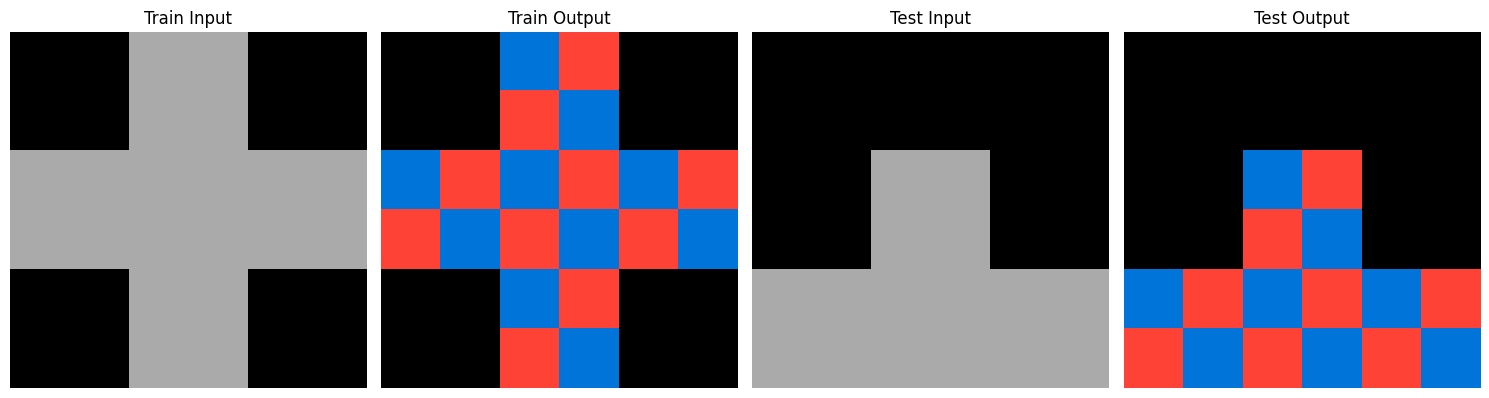

task: repeat_pattern_and_add_neighboring_pixels count: 2 example: 7


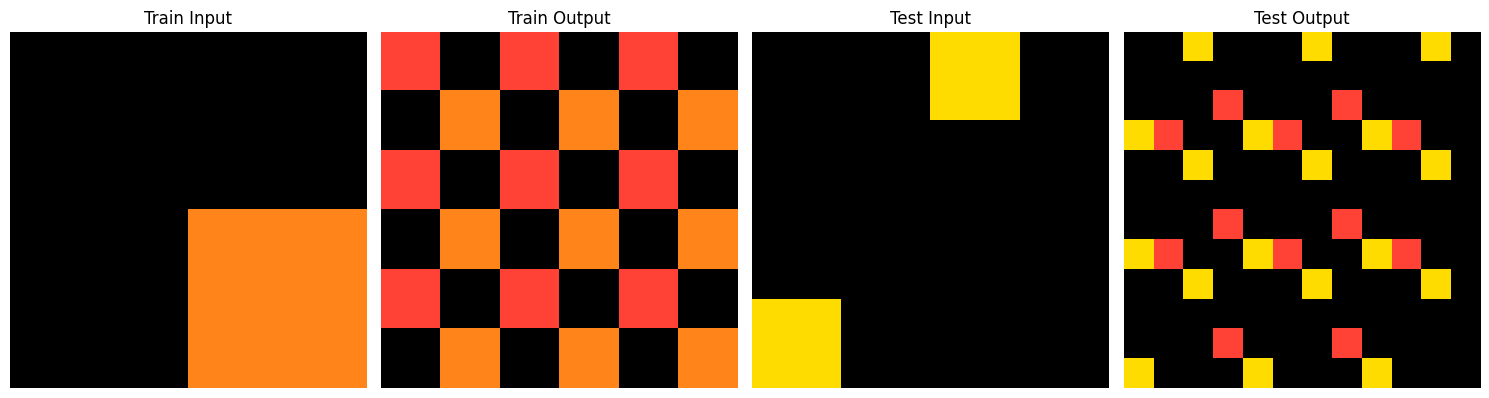

task: unknown count: 7 example: 8


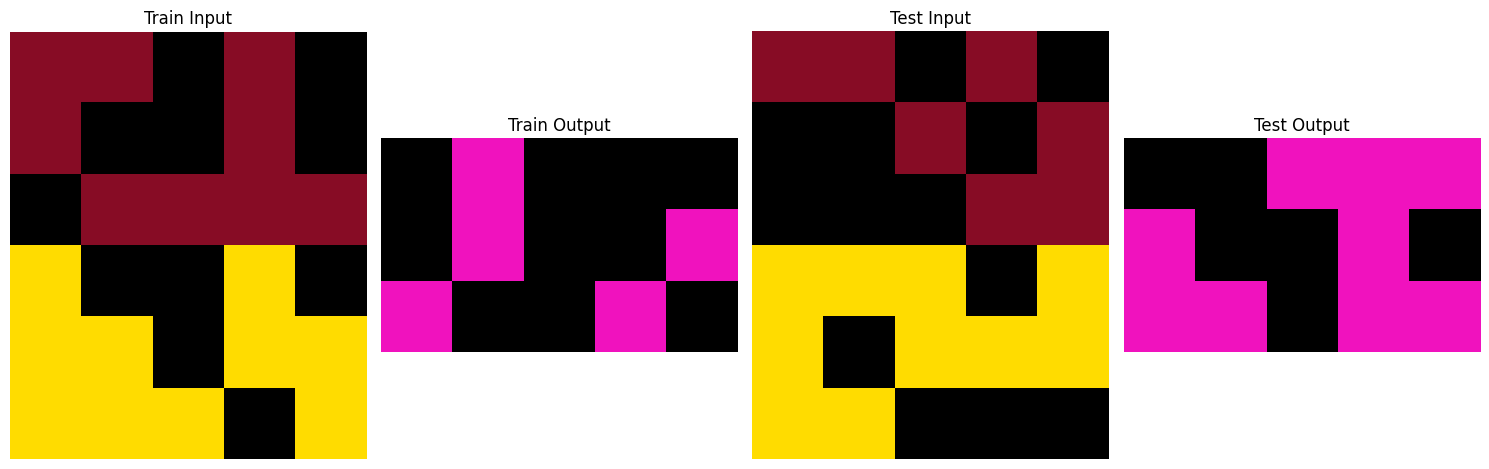

task: repeat_pattern_with_inversion count: 1 example: 12


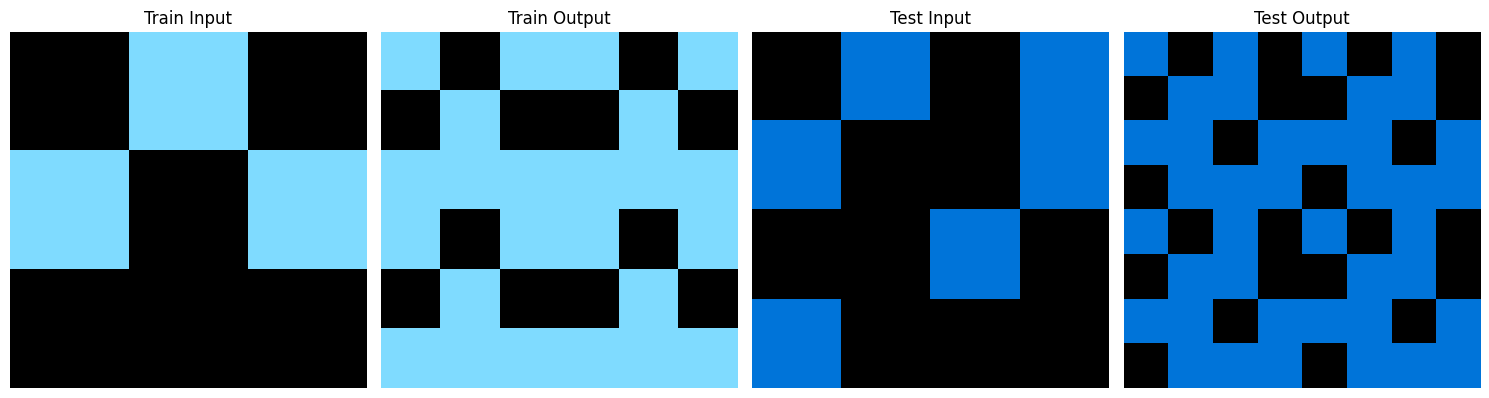

task: fill_missing_pixels count: 1 example: 14


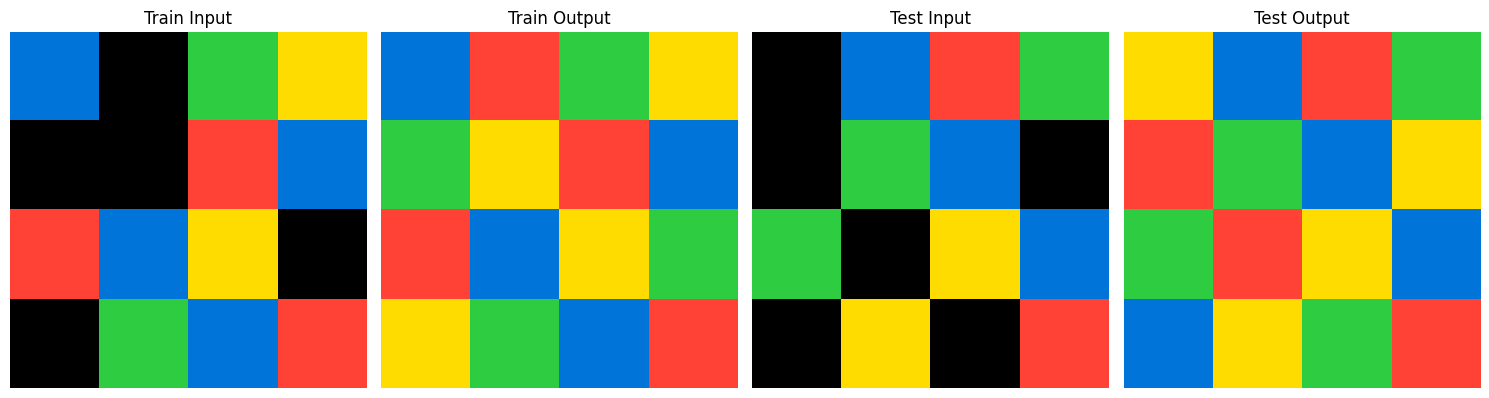

task: union count: 3 example: 15


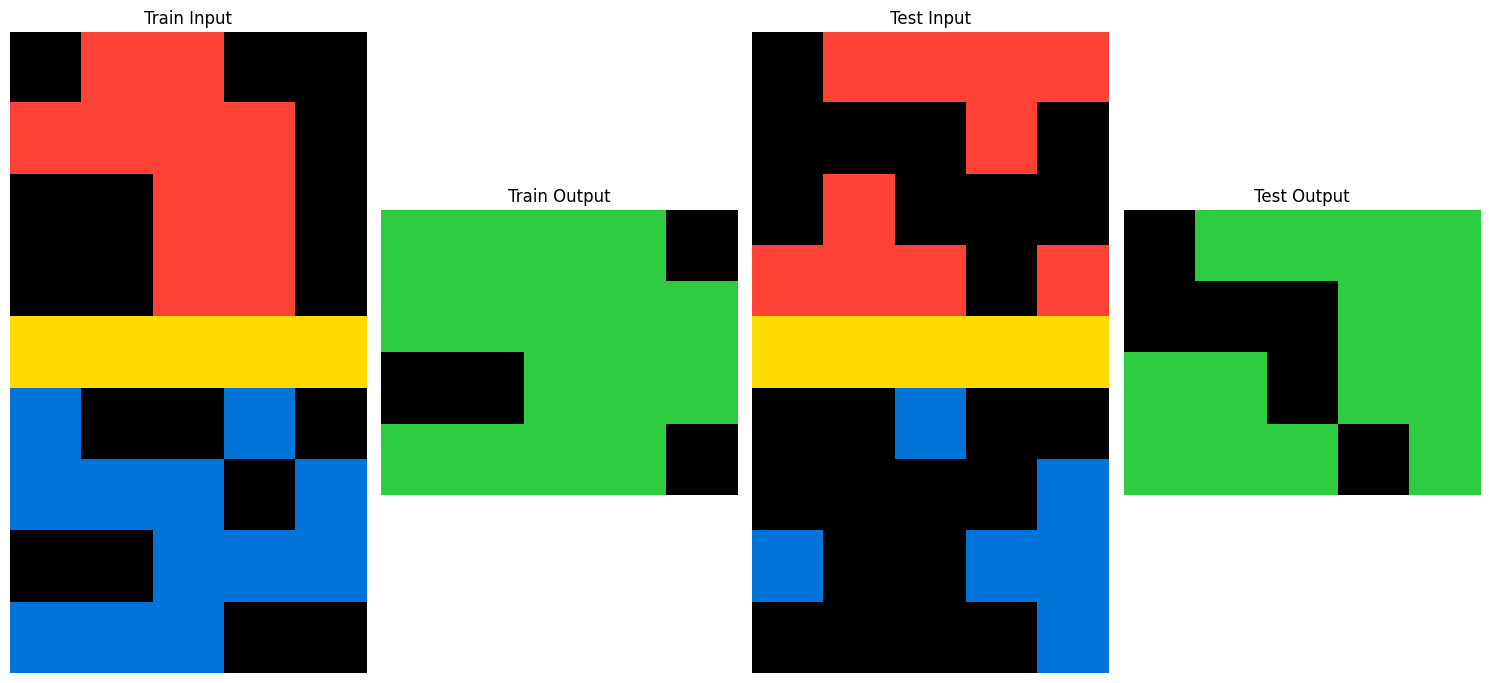

task: extend_pattern count: 6 example: 16


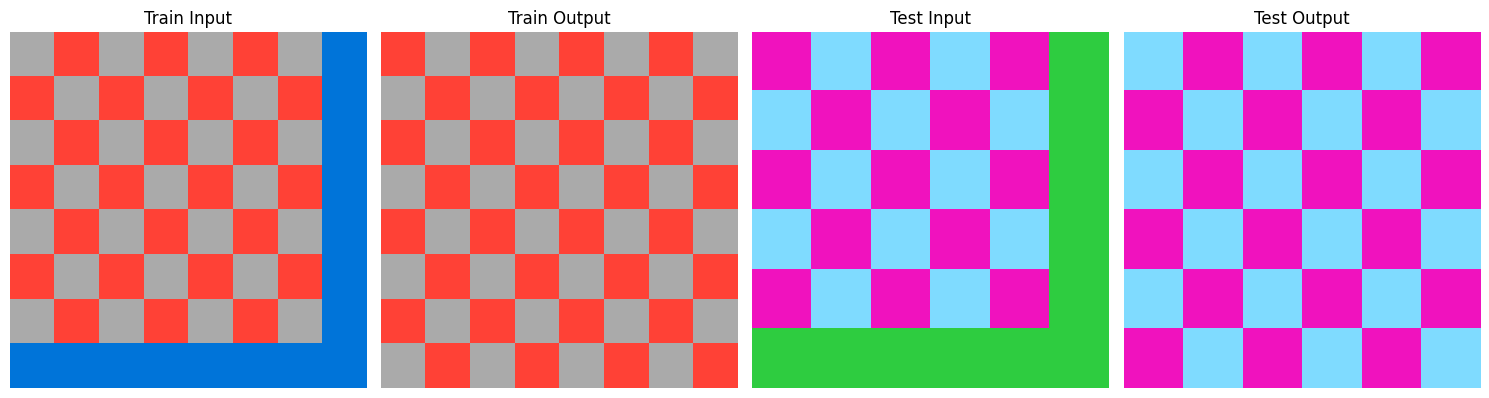

task: copy_input count: 2 example: 19


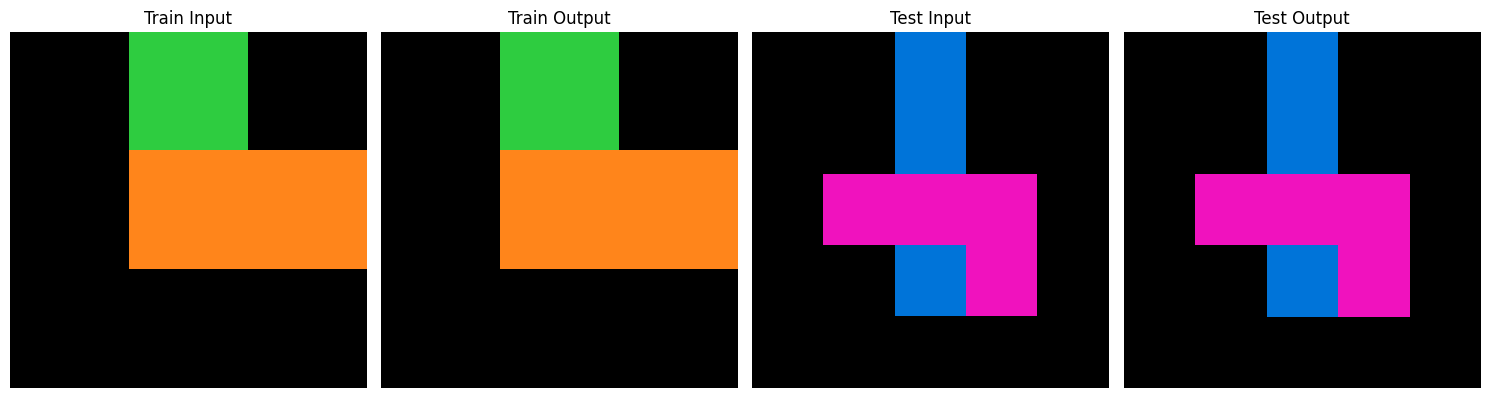

task: detect_shapes count: 2 example: 20


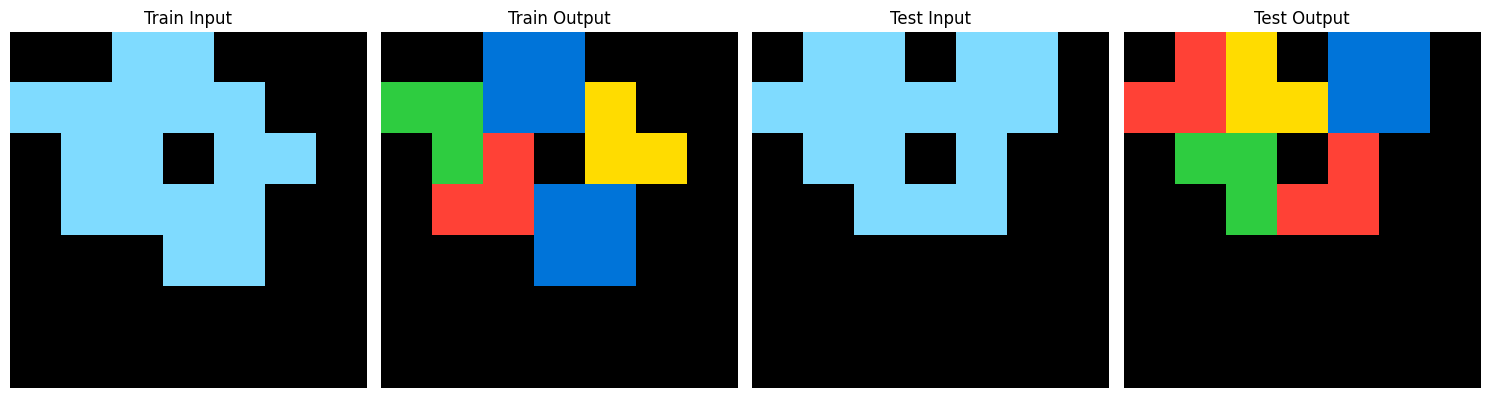

task: invert_pattern count: 1 example: 24


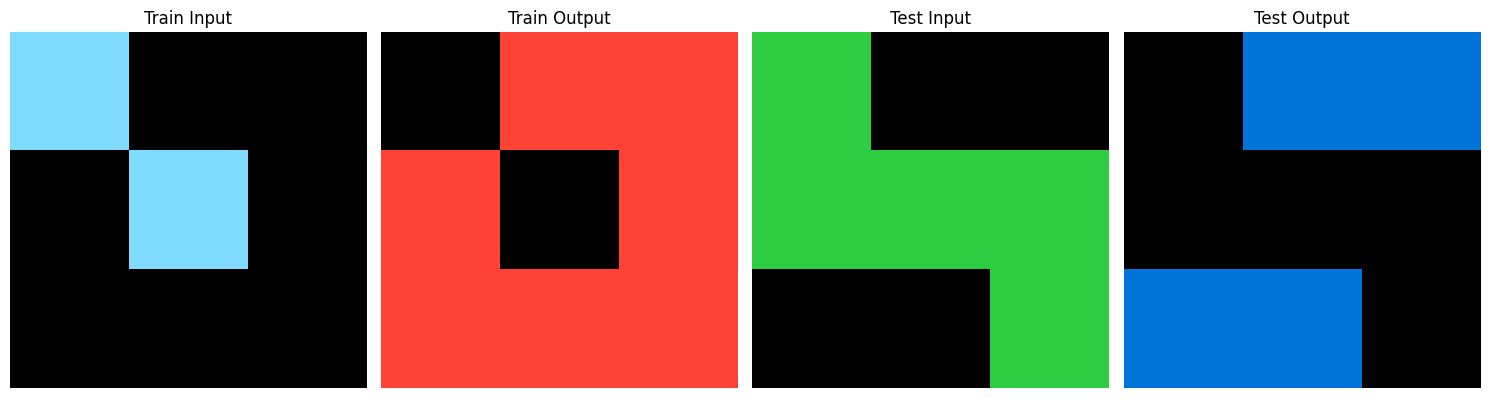

task: fix_output count: 1 example: 30


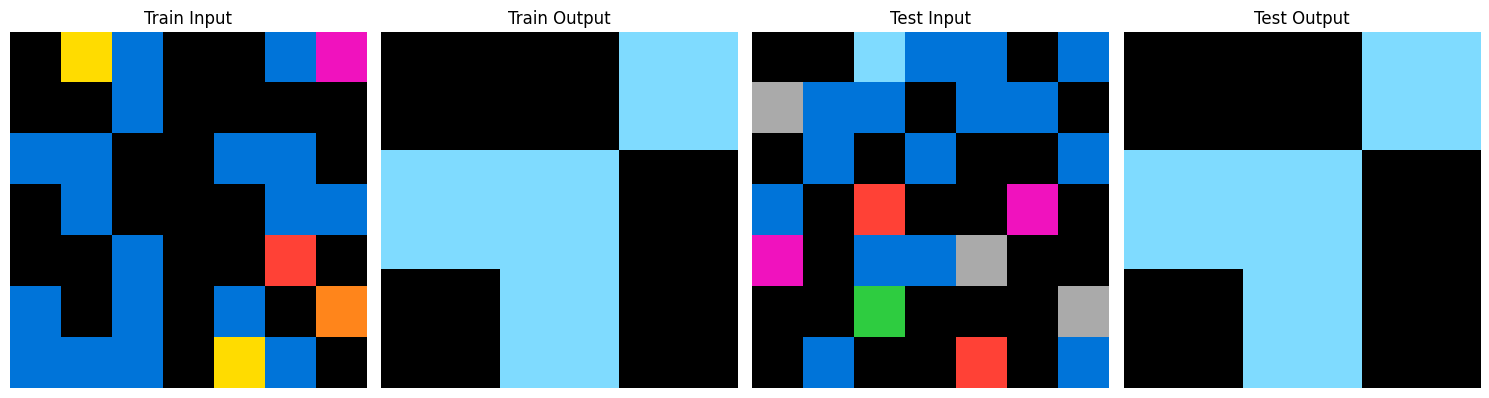

task: fill_shape count: 1 example: 33


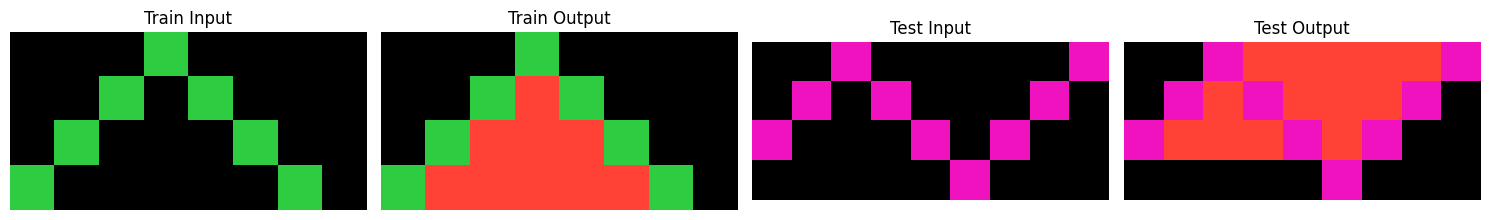

task: repeat_pattern count: 1 example: 44


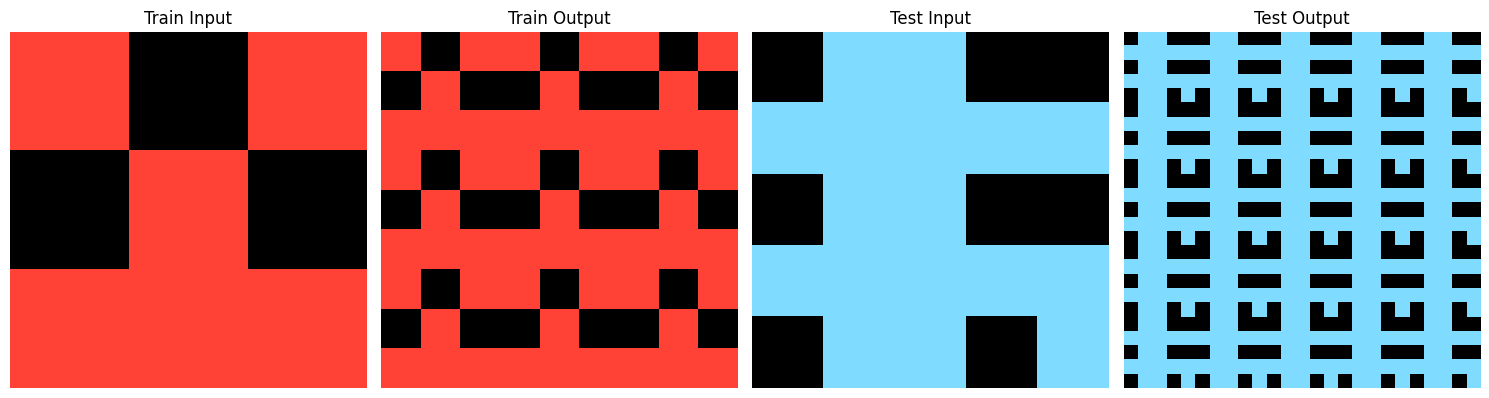

task: crop count: 1 example: 46


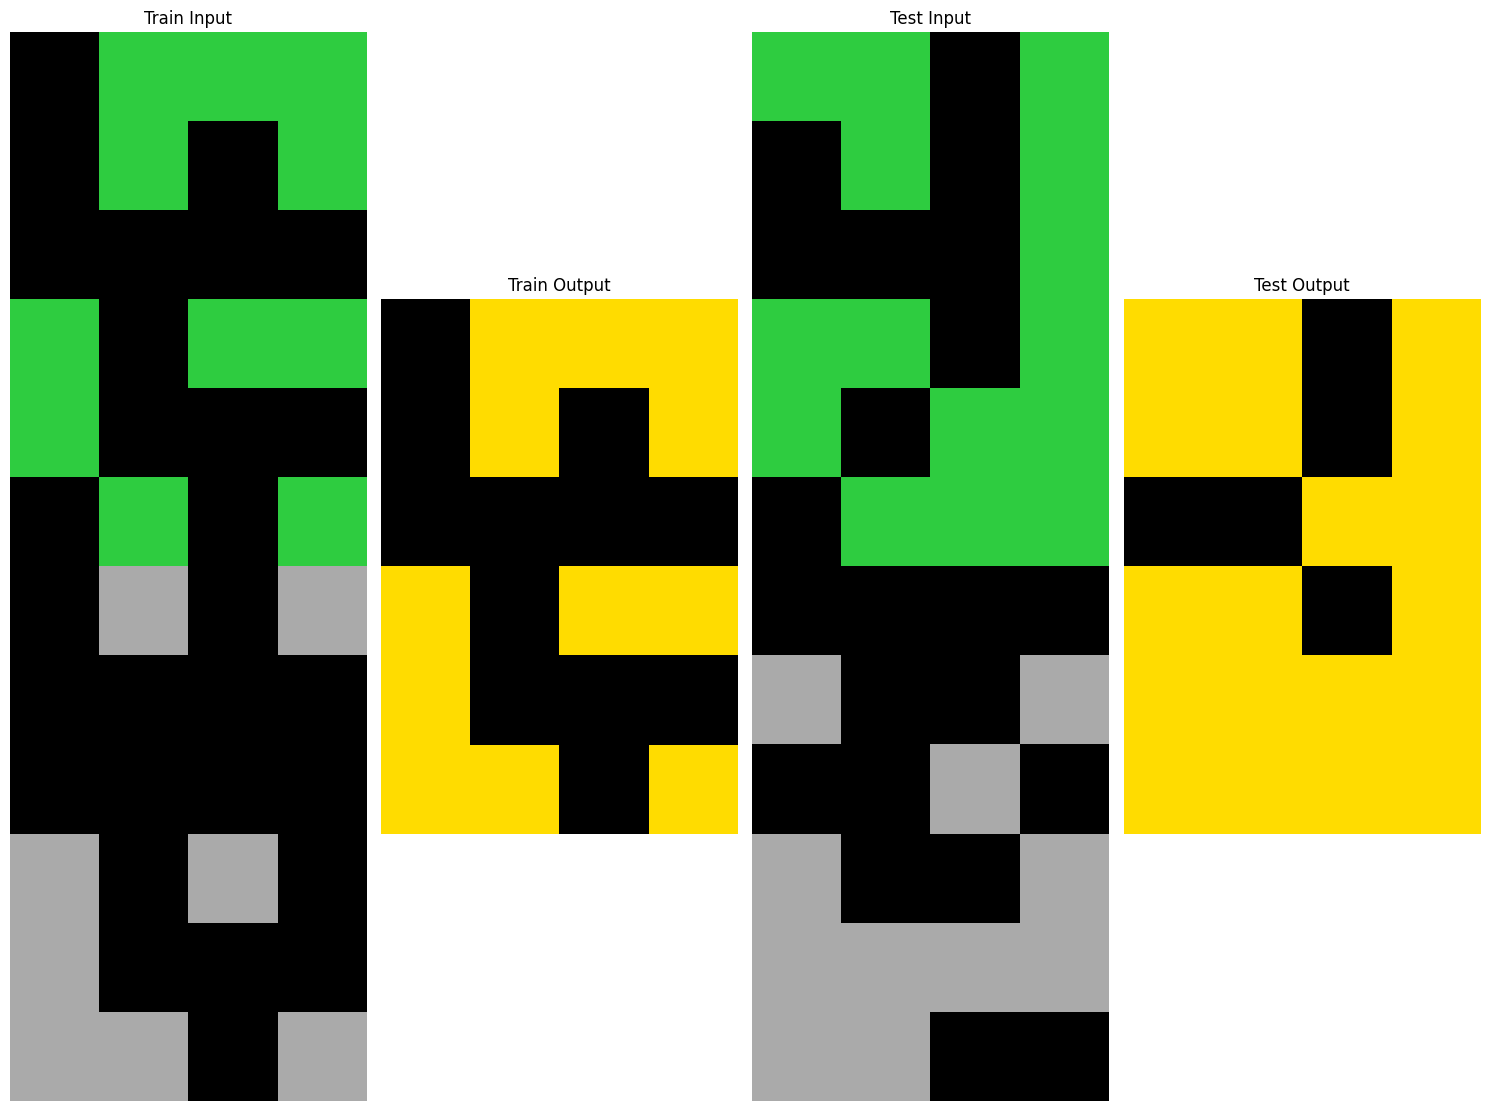

task: reorder count: 1 example: 49


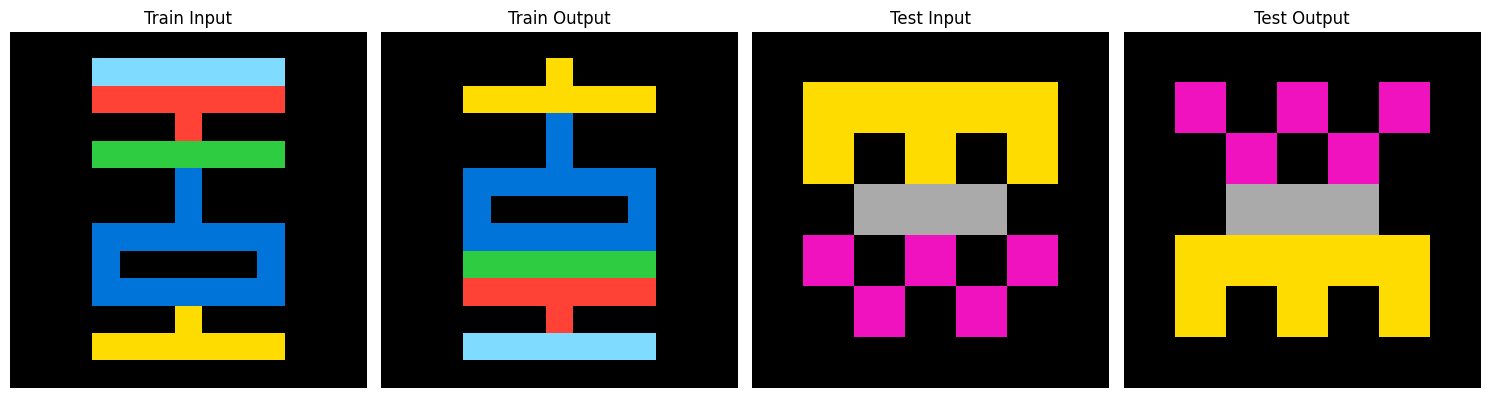

task: no_overlap count: 1 example: 50


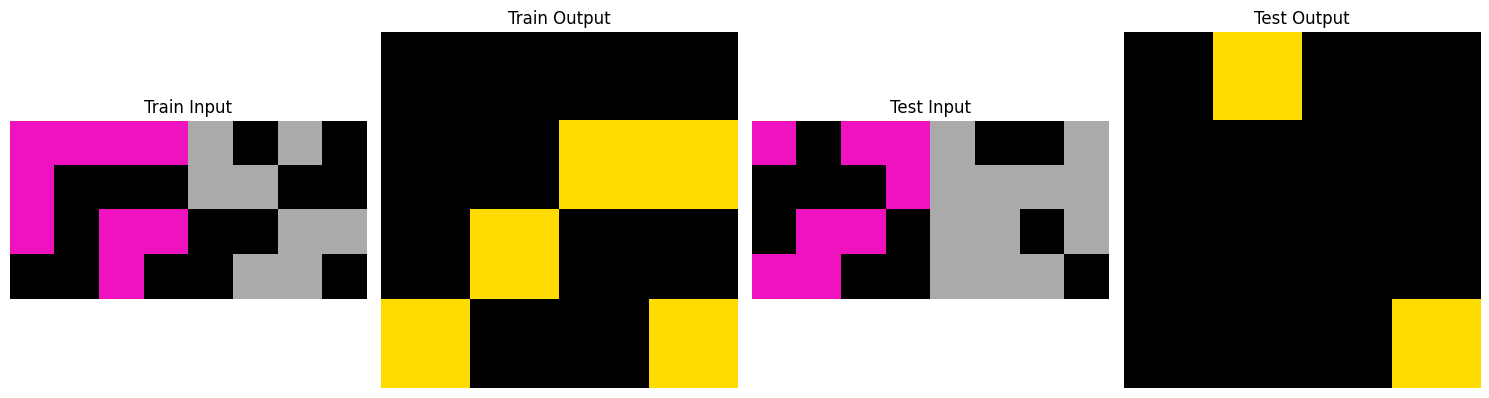

task: scale count: 1 example: 51


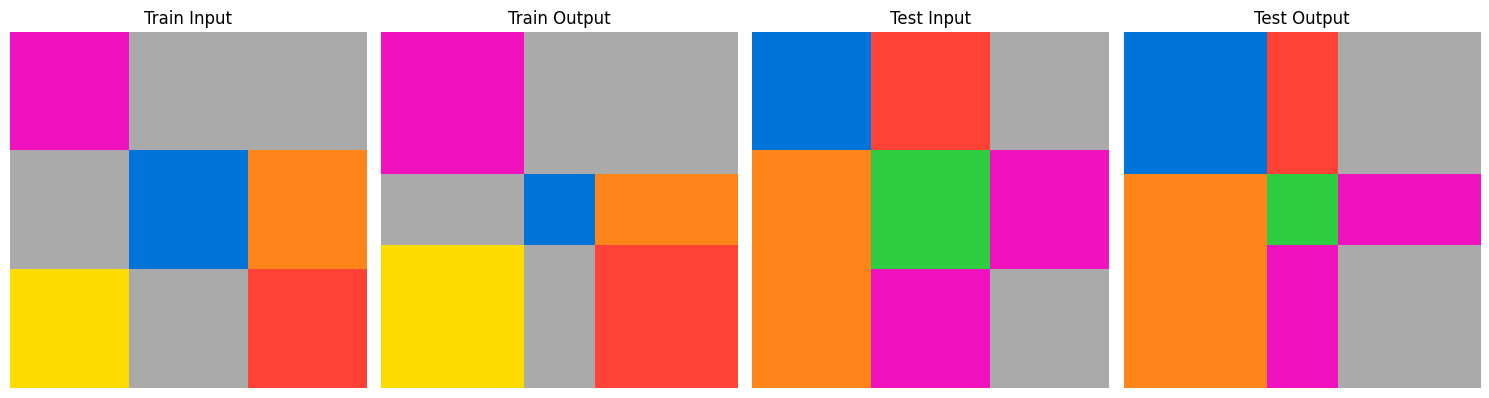

task: choose_larger count: 1 example: 53


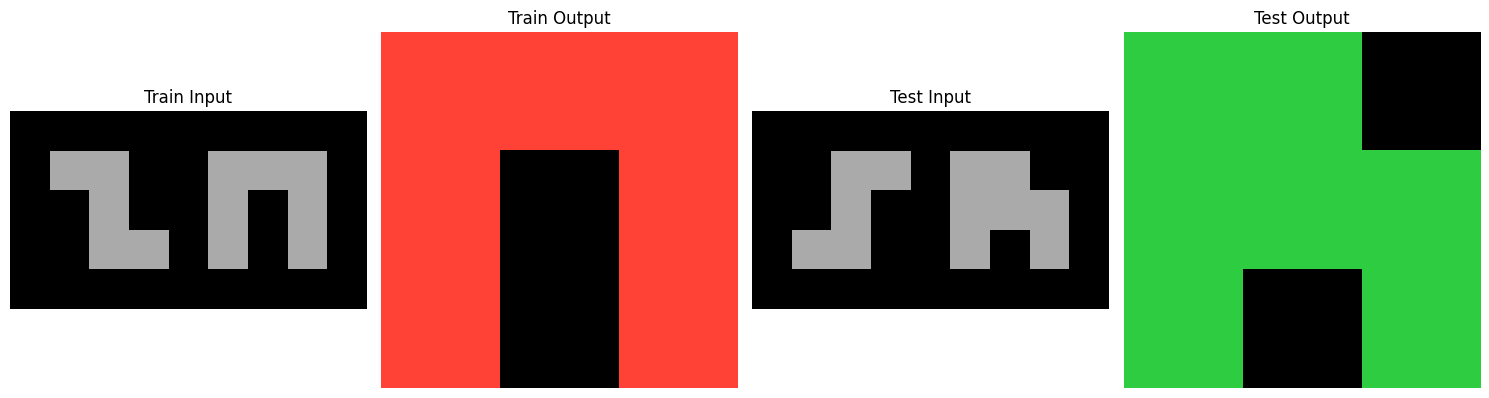

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec

import json
import os

from pprint import pprint

task_names = []
task_examples = []
task_count = []

for task in evaluation_tasks:
    task_name = task["main_task"]
    
    if task_name in task_names:
        i = task_names.index(task_name)
        task_count[i] += 1
    else:
        task_names.append(task_name)
        task_examples.append(task["index"])
        task_count.append(1)


for i,_ in enumerate(task_names):
    print(f"task: {task_names[i]} count: {task_count[i]} example: {task_examples[i]}")
    plot_examples(VALID_SMALL_PATH, [task_examples[i]])